# Analyzing the effects of the number of cache levels on average memory access time

The idea behind multi-level caching is to have larger and larger caches to reduce the need to access main memory. Ideally, there would be a single very-large and very-fast level of cache, however implementations like this are incredibly expensive to implement. 

For multi-level caches, the access time and cache size will increase as the cache gets closer to main memory. As we can see there is a point where the added latency of writing through many levels causes the amat_write to get high enough that having many levels provides no benefit over a single level. In the case of amat_read, the benefits of increased cache size dominated over the times needed to access multiple levels. 

The fact that the average amat was much closer to the amat_read results demonstrates the importance in optimizing the common case, as the number of read instructions in the chosen benchmark is very high compared to the number of write instructions. 

In [10]:
import os, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from glob import glob

levels = ['1levels', '2levels', '3levels','4levels']
results = {}

# For each policy, get the result files
for level in levels:
    # Each plicy will have a list in the dictionary of results
    results[level] = []
    for f_name in glob(os.path.join('..', 'cache_config', 'results', 'Number_Levels_Comparaison', level, '*.json')):
        print(f_name)
        with open(f_name) as f:
            results[level].append(json.load(f))
            f.close
        

../cache_config/results/Number_Levels_Comparaison/1levels/compitomin_config1_1levels.json
../cache_config/results/Number_Levels_Comparaison/1levels/compitomin_config2_1levels.json
../cache_config/results/Number_Levels_Comparaison/1levels/compitomin_config3_1levels.json
../cache_config/results/Number_Levels_Comparaison/2levels/compitomin_config2_2levels.json
../cache_config/results/Number_Levels_Comparaison/2levels/compitomin_config1_2levels.json
../cache_config/results/Number_Levels_Comparaison/2levels/compitomin_config3_2levels.json
../cache_config/results/Number_Levels_Comparaison/3levels/compitomin_config3_3levels.json
../cache_config/results/Number_Levels_Comparaison/3levels/compitomin_config1_3levels.json
../cache_config/results/Number_Levels_Comparaison/3levels/compitomin_config2_3levels.json
../cache_config/results/Number_Levels_Comparaison/4levels/compitomin_config1_4levels.json
../cache_config/results/Number_Levels_Comparaison/4levels/compitomin_config2_4levels.json
../cache_c

Now that we have loaded all result files, we can get the average for the AMAT across all configurations

In [11]:
def average(results, keyword):
    avrg = 0    
    for result in results:
        avrg += result[keyword]
        
    return avrg / len(results)
    

# Define the name of the variables of interest
interest_var = ['amat', 'amat_read', 'amat_write']
amat_results = {}

for var in interest_var:
    amat_results[var] = []
    for level in levels:
        amat_results[var].append(average(results[level], var))

In [12]:
amat_results

{'amat': [38.47826086956522,
  19.157971014492755,
  15.01304347826087,
  14.595652173913045],
 'amat_read': [38.0365296803653,
  18.199391171993913,
  13.65601217656012,
  12.955859969558597],
 'amat_write': [47.27272727272727,
  38.24242424242424,
  42.03030303030303,
  47.24242424242424]}

amat values:
	amat_1levels = 38.47826086956522 cycles
	amat_2levels = 19.157971014492755 cycles
	amat_3levels = 15.01304347826087 cycles
	amat_4levels = 14.595652173913045 cycles
amat_read values:
	amat_read_1levels = 38.0365296803653 cycles
	amat_read_2levels = 18.199391171993913 cycles
	amat_read_3levels = 13.65601217656012 cycles
	amat_read_4levels = 12.955859969558597 cycles
amat_write values:
	amat_write_1levels = 47.27272727272727 cycles
	amat_write_2levels = 38.24242424242424 cycles
	amat_write_3levels = 42.03030303030303 cycles
	amat_write_4levels = 47.24242424242424 cycles


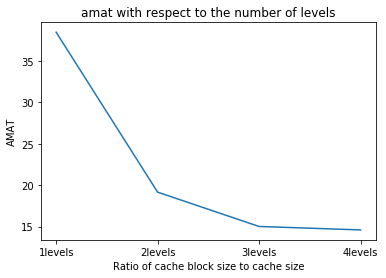

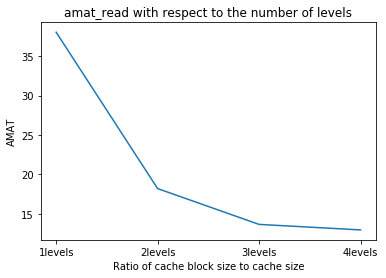

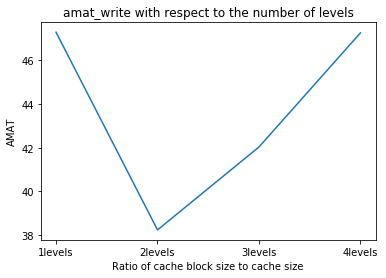

In [13]:
import math

for var in interest_var:
    print(var + " values:")
    for level in levels:
        print('\t' + var + '_' + level + " = " + str(amat_results[var][levels.index(level)]) + ' cycles')
        
ratio = []
for i in range(len(levels)):
    ratio.append(math.pow(2, (i+1)))

for var in interest_var:
    plt.plot(levels, amat_results[var])
    plt.title(var + " with respect to the number of levels")
    plt.xlabel('Ratio of cache block size to cache size')
    plt.ylabel('AMAT')
    plt.show()